In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Initial dataset review

In [26]:
data = pd.read_csv('books.csv', on_bad_lines = 'skip')

In [27]:
print("Dataset shape: ", data.shape)
print("\nDataset info: ")
print(data.info())

Dataset shape:  (11123, 12)

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None


In [29]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               2759

In [33]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


As we can see there is no missing values in out dataset, so we do not have to filter out based on them

In [42]:
data.dtypes #checking the data types of each column

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [43]:
data.describe() #checking for hidden values such as the maximum rating of our books, the average number of ratings

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


From the table above it is clear that the maximum rating is 5 and minimum is 0

In [47]:
top_ten = data[data['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


# Graph plots and their analysis

C:\Users\Asadulla\AppData\Local\Temp\ipykernel_18728\797343686.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Axes: xlabel='average_rating', ylabel='title'>

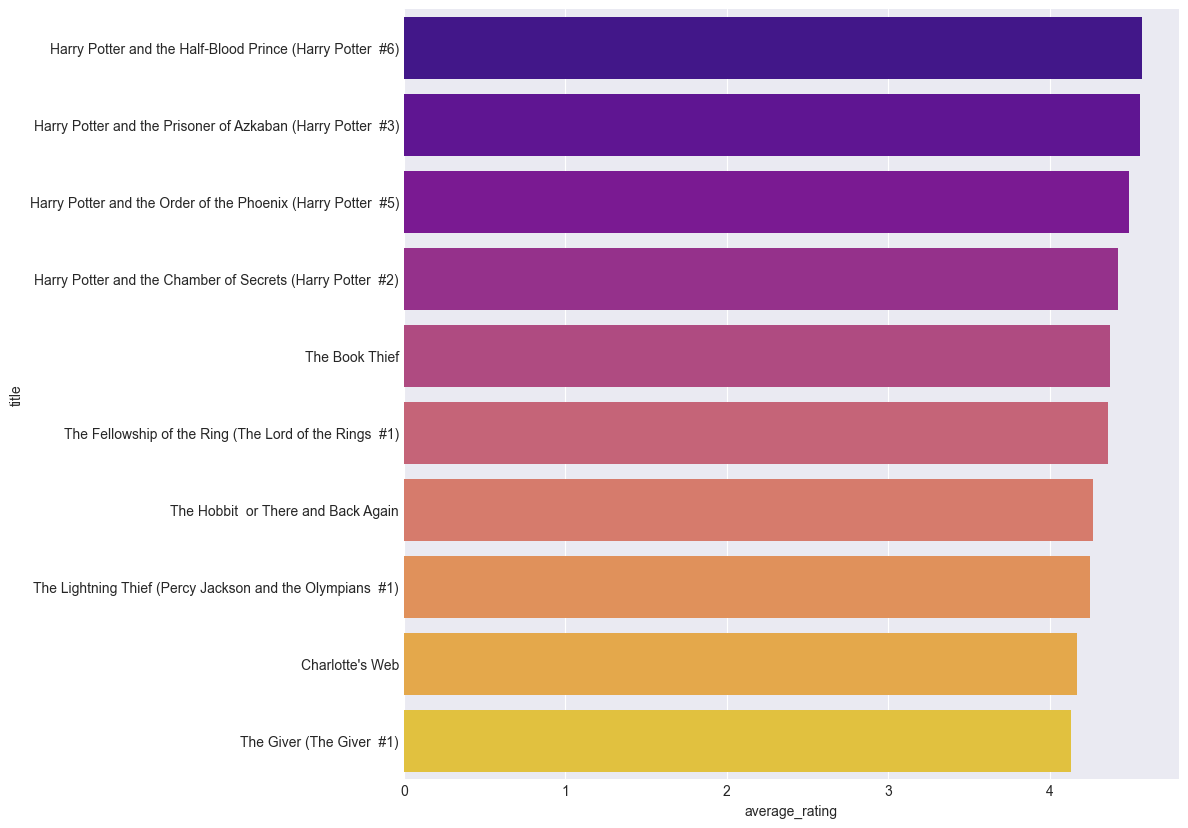

In [56]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))
d = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x='average_rating', y='title', data=d, palette="plasma")

So what we did here is plotted that barchart of the top 10 highest rated books taking into consideration the amount of those who voted. It is essential to consider the number of voters since there might be a cases where small amount of voters accounted for high average rating, which would not give an objective picture of the highest rated books

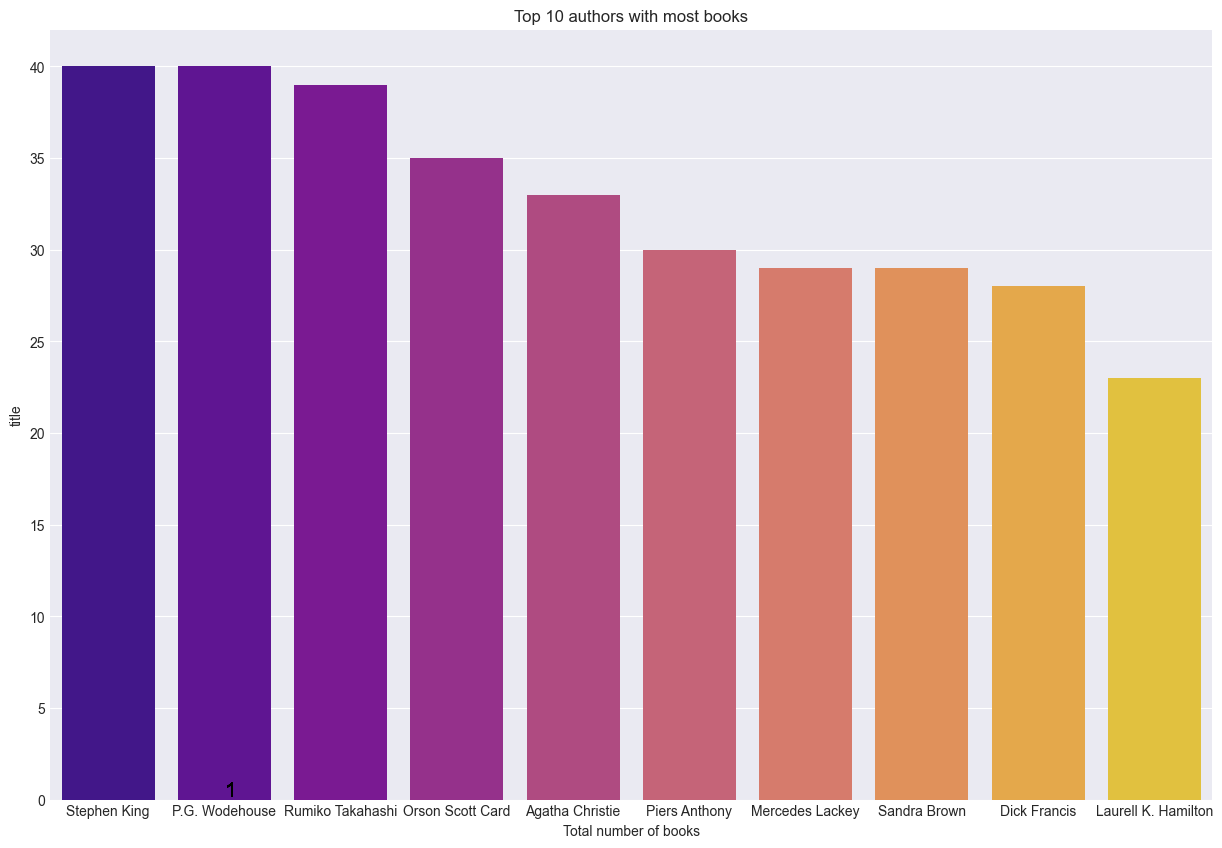

In [128]:
most_books = data.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_books.index, y=most_books['title'], palette='plasma')
ax.set_title('Top 10 authors with most books')
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15, color='black')
plt.show()

Here we can see the barchart of the authors with the most books in our dataset.

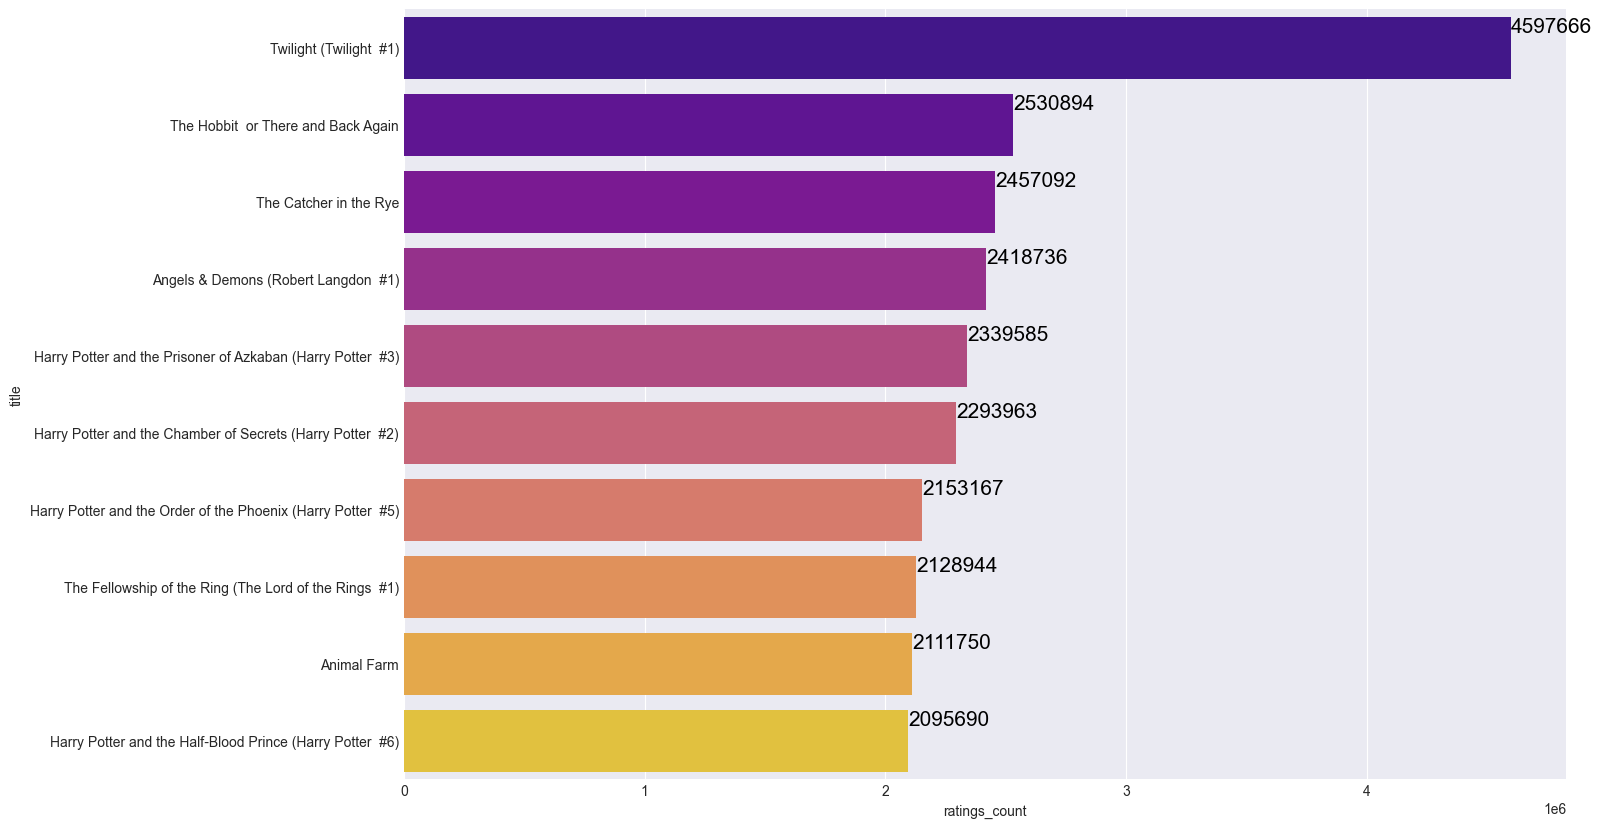

In [79]:
most_rated = data.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette = 'plasma')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Now we have a graph of books with the most amount of ratings. 

<Axes: title={'center': 'Languages'}, xlabel='language_code', ylabel='count'>

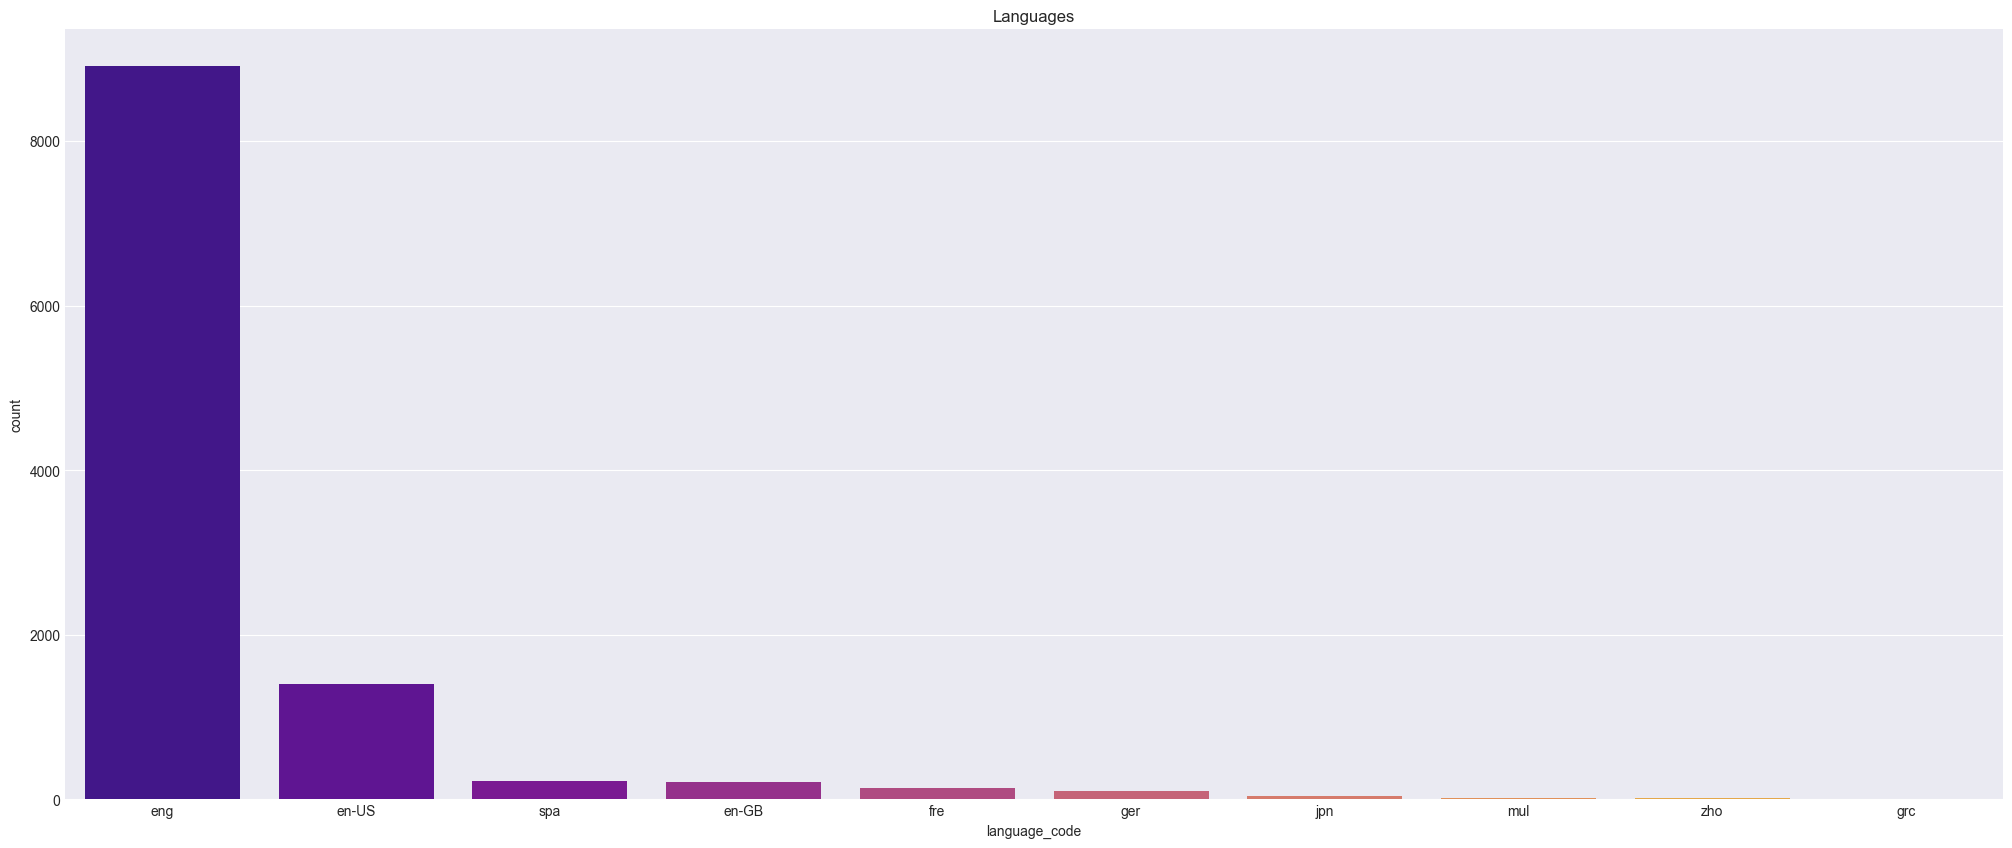

In [85]:
plt.figure(1, figsize=(25,10))
plt.title("Languages")
sns.countplot(x = "language_code", order=data['language_code'].value_counts().index[0:10] ,data=data,palette='plasma')

C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37057 (\N{CJK UNIFIED IDEOGRAPH-90C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python311\Lib\site-packages\IPython\core\pylabt

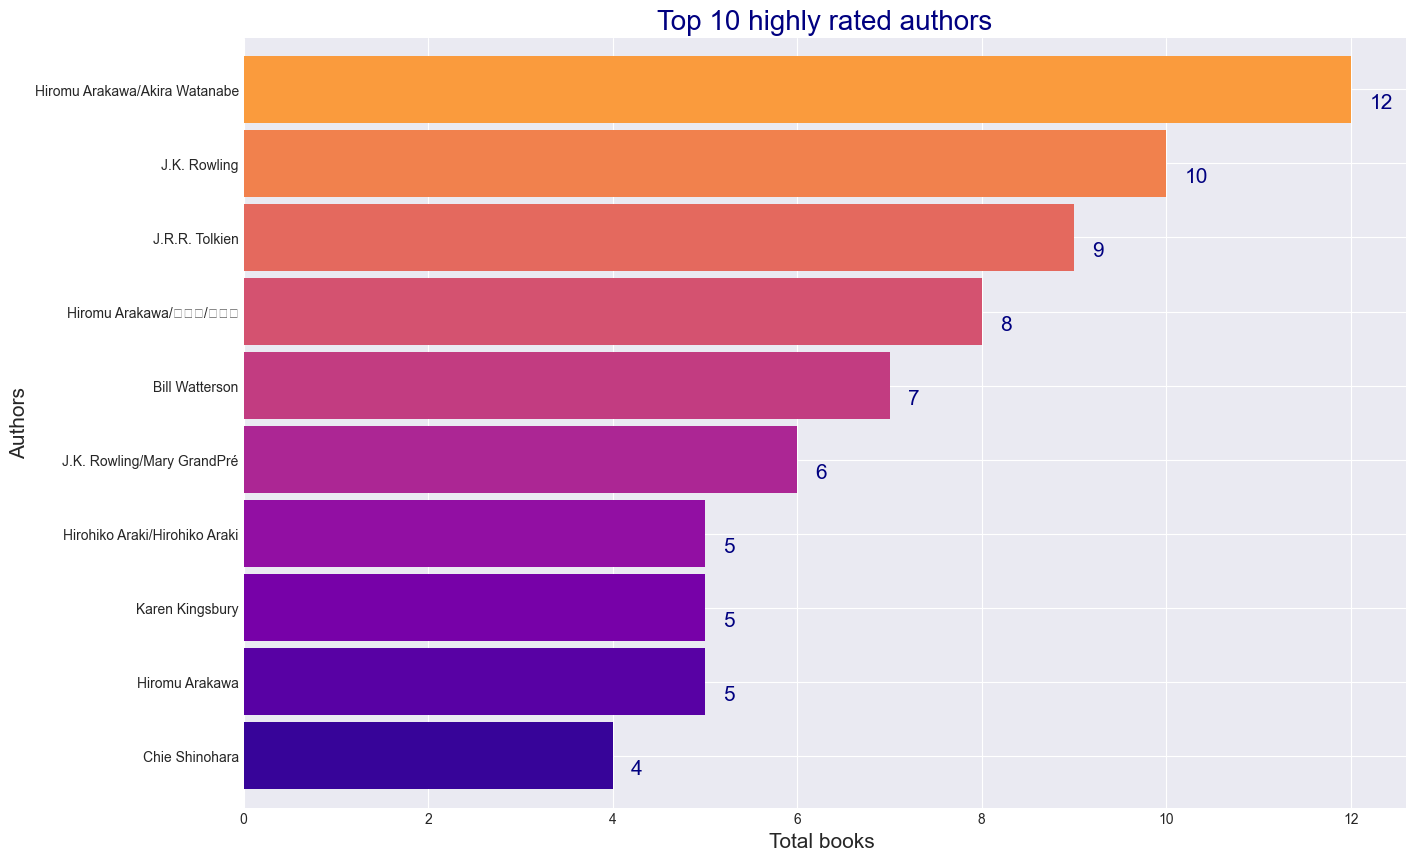

In [87]:
highly_rated_author =data[data['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(15,10))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('plasma',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='navy')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='navy')
plt.show()

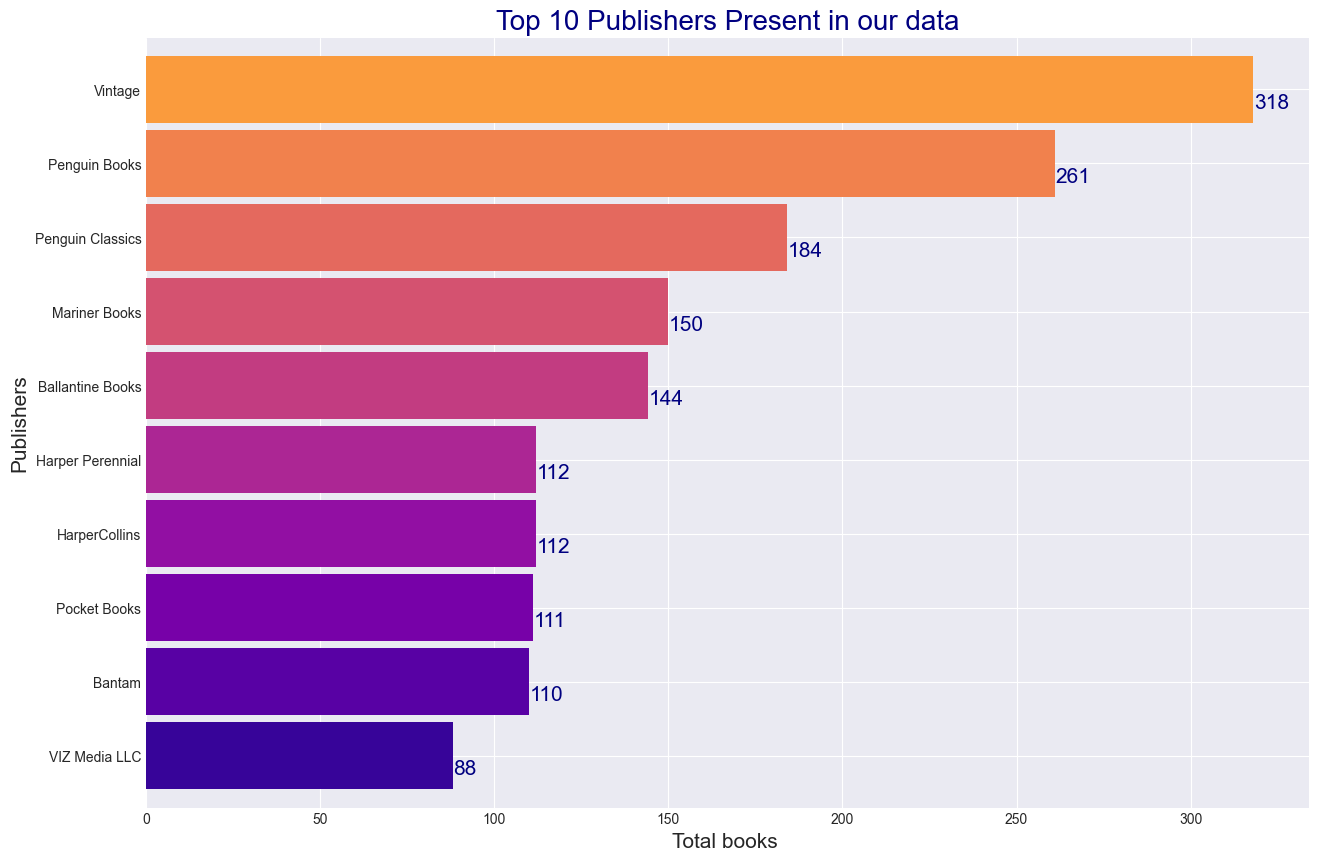

In [89]:
top_publishers = data.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('plasma',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)
ax.set_title("Top 10 Publishers Present in our data",fontsize=20,color='navy')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='navy')
plt.show()

# Overall analysis of the dataset

C:\Users\Asadulla\AppData\Local\Temp\ipykernel_18728\3488227282.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_rating'],ax=ax)


Text(0.5, 0, 'Average rating')

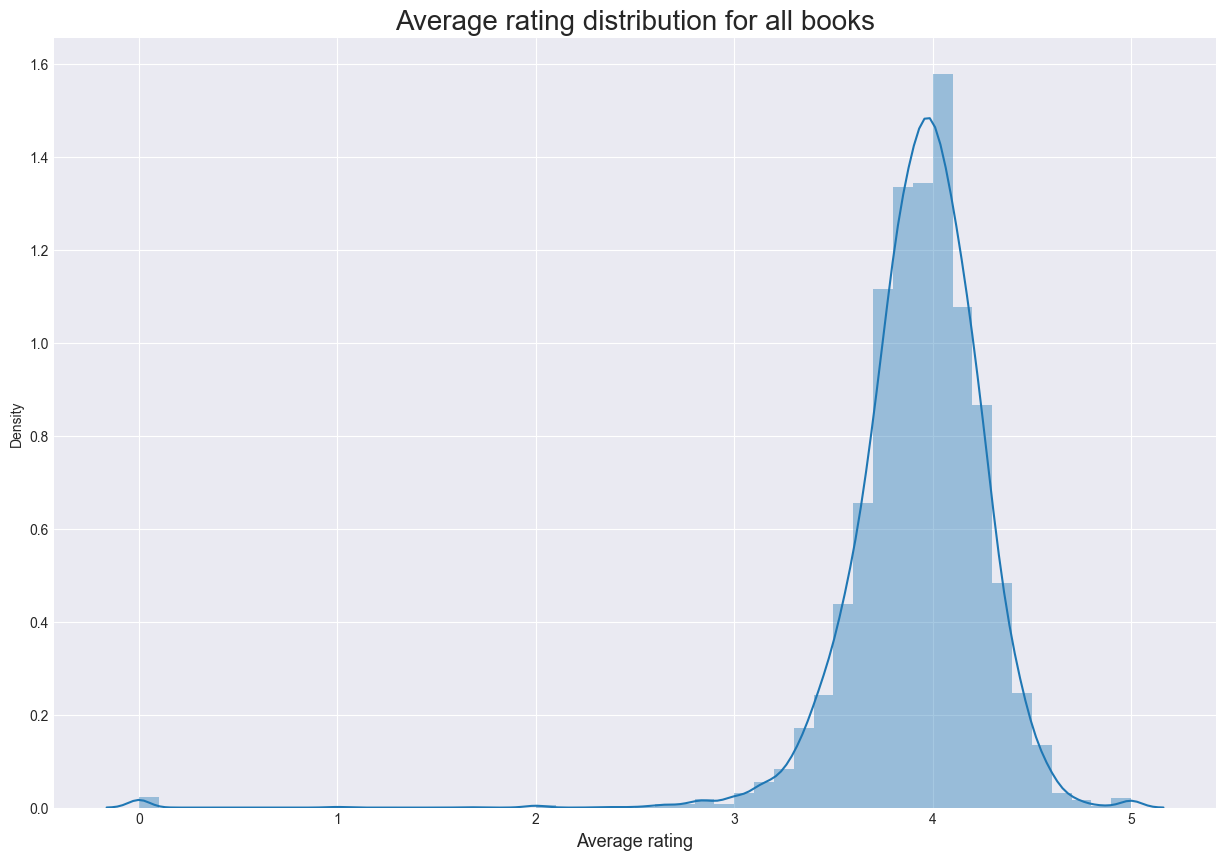

In [90]:
data.average_rating = data.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(data['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

According to the plot, it is clear that almost all the ratings are distributed between ~3.0 to ~4.5. We also can observe that, the ratings of ~0,5 are rare and the same goes with other ratings.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


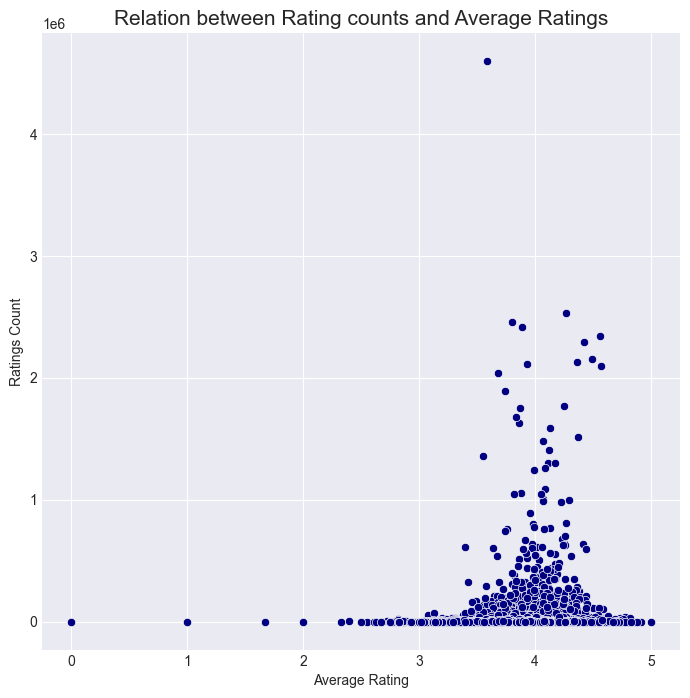

In [98]:
ax = sns.relplot(data=data, x="average_rating", y="ratings_count", color = 'navy', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

Here we are trying to observe, if there is a relation between amount of rates and the quality of the rating.

<Figure size 1500x1000 with 0 Axes>

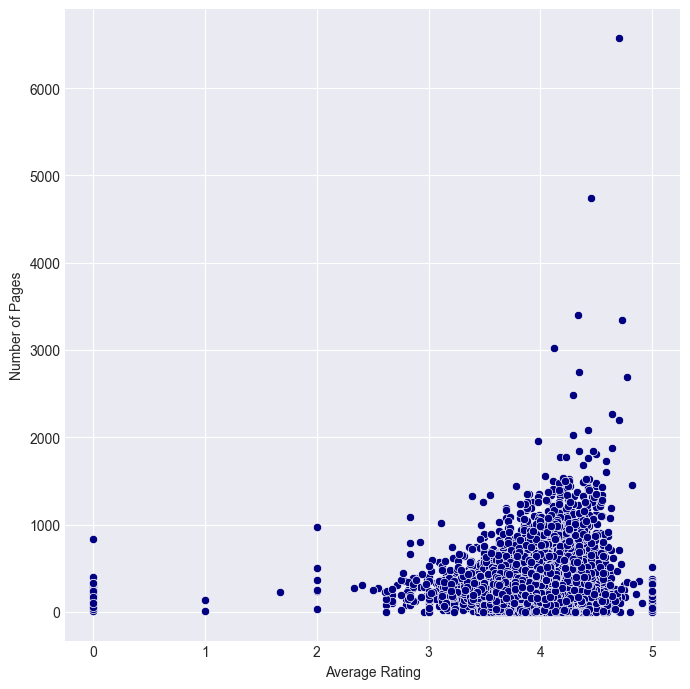

In [97]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = data, color = 'navy',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

Here we are trying to observe, if there is a relation between amount of pages and the quality of the rating.

<Figure size 1500x1000 with 0 Axes>

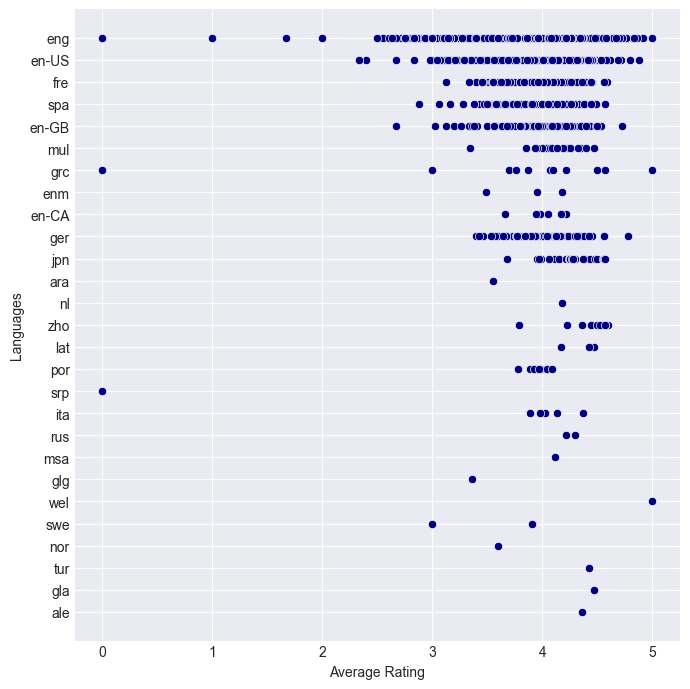

In [96]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="language_code", data = data, color = 'navy',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Languages")

Here we are trying to observe, if there is a relation between the language and the quality of the rating.

<Figure size 1500x1000 with 0 Axes>

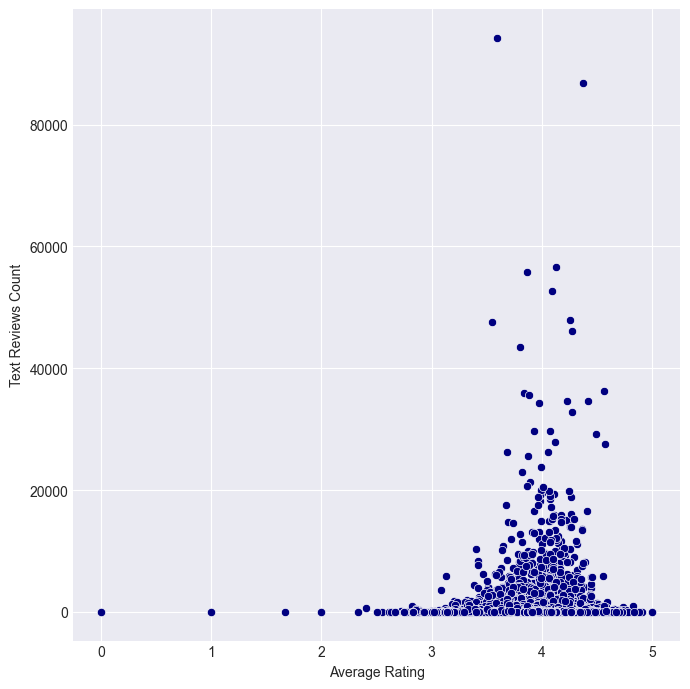

In [100]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = data, color = 'navy',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Text Reviews Count")

Here we are trying to observe, if there is a relation between amount of text reviews and the quality of the rating.


By analyzing all the charts, we can take into consideration the relation of the rating quality to Language and Amount of the ratings. Other graphs weren't making much sense and using them may not contribute to the accuracy as desired.

In [49]:
df = data.copy()

In [50]:
df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

Here we are dividing our average rating comlumn into seperate categorical ranges such as from 0 to 1, 1 to 2, 2 to 3, and so on. The appending the dataset with one more column called rating_between.

In [104]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


Now let's create two datasets(which is basically a truth table) for rating_between and the language. If the book falls into a category of the column then the value True is assigned, otherwise False is assigned. For any specific book there might only be one true column in both datasets. For example, for the book "1984" only the column between 4 and 5 is assigned with True, and in language dataset only the eng column is assigned with True, all the other columns in both datasets are assigned with the value False.

In [105]:
rating_data = pd.get_dummies(df['rating_between'])
rating_data.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [106]:
language_data = pd.get_dummies(df['language_code'])
language_data.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let's concatenate the dataset we have formed + the average_rating and ratings_count to form a dataset, which we will feed to our model

In [107]:
features = pd.concat([rating_data, language_data, df['average_rating'], df['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428


In [108]:
from sklearn.preprocessing import MinMaxScaler

After preparing our features, we will proceed to apply the Min-Max scaler to normalize these values. This scaling technique aims to reduce bias for books with an excessive number of features. Essentially, it calculates the median for all features and equalizes them.

In [109]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

After successfully scaling down our features, the next step is to employ the KNN algorithm to establish our Recommendation system.

In [110]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
The Recommendation System will take the title of the book and based on that

In [116]:
def RecommendBook(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

In [122]:
Books = RecommendBook("Man's Search for Meaning")

In [123]:
Books

["Man's Search for Meaning",
 'The Lorax',
 "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1-5)",
 'Mere Christianity',
 'A Light in the Attic',
 'Dragonfly in Amber (Outlander  #2)']

In [124]:
Books = RecommendBook("1984")

In [126]:
Books

['1984',
 'Blandings Castle (Blandings Castle  #3)',
 'The Diary of Anaïs Nin  Vol. 3: 1939-1944',
 'Shoofly Pie (Bug Man  #1)',
 'A Divine Revelation of Hell',
 'Cookies: Bite-Size Life Lessons']

As we can see it comes up with quite impressive results such as 'The Diary of Anaïs Nin  Vol. 3: 1939-1944' for the '1984'. There are other examples as well. However, it is still not perfect and needs to be further improved based on the relations of the other columns of a dataset. Overall, out of 5 it might come up with at least 1 impressive, 1 good, 1 very close to good, and others might be not really close.